In [1]:
install.packages("ggplot2")
install.packages("patchwork")
install.packages("reshape2")
install.packages("ggpubr")
install.packages("DT")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(Seurat)
library(DT)
library(ggplot2)
library(patchwork)
library(reshape2)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject


Attaching package: ‘DT’


The following object is masked from ‘package:SeuratObject’:

    JS


The following object is masked from ‘package:Seurat’:

    JS




In [3]:
stringsAsFactors = FALSE

In [4]:
fdir <- "/data2/ZenNa/mice_count_data"


In [6]:
sample_files <- list.files(fdir, pattern = "*.counts.tsv", full.names = TRUE, all.files = FALSE)


In [7]:
sample_files

[1] "/data2/ZenNa/mice_count_data/GSM5661621_D-1.counts.tsv"
[2] "/data2/ZenNa/mice_count_data/GSM5661622_D-3.counts.tsv"
[3] "/data2/ZenNa/mice_count_data/GSM5661623_D-5.counts.tsv"
[4] "/data2/ZenNa/mice_count_data/GSM5661624_D-7.counts.tsv"
[5] "/data2/ZenNa/mice_count_data/GSM5661625_W-1.counts.tsv"
[6] "/data2/ZenNa/mice_count_data/GSM5661626_W-3.counts.tsv"
[7] "/data2/ZenNa/mice_count_data/GSM5661627_W-5.counts.tsv"
[8] "/data2/ZenNa/mice_count_data/GSM5661628_W-7.counts.tsv"

In [39]:
seurat_objects <- list()

for (i in 1:length(sample_files)) {
  sample_file <- sample_files[i]
  # Extract the file name without the path
  sample_name <- basename(sample_file)
  
  # Read the data
  data <- read.table(sample_file, header = TRUE, row.names = 1)
  
  # Create a Seurat object
  seurat_obj <- CreateSeuratObject(counts = data, project = sample_name, min.cells= 3, min.features =200)
    
     # Subset the Seurat object based on specific criteria
   seurat_obj[["percent.mt"]] <- PercentageFeatureSet(seurat_obj, pattern = "^mt-")

  seurat_obj <- subset(seurat_obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
  
  # Store the Seurat object in the list
  seurat_objects[[sample_name]] <- seurat_obj
}


In [40]:
# Access and print a specific portion of each Seurat object (e.g., first 10 rows and 10 columns)
for (sample_name in names(seurat_objects)) {
  cat("Sample:", sample_name, "\n")
  d3.obj <- seurat_objects[[sample_name]]
  print(d3.obj@assays$RNA@data[1:10, 1:10])
}

Sample: GSM5661621_D-1.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C1’, ‘C2’, ‘C4’ ... ]]



                                 
0610009B22Rik . . . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik . . . 1 . . . . . .
0610010K14Rik . . . . . . . . . .
0610012G03Rik . . . . . . . . . .
0610030E20Rik . . . . . . . . 1 .
0610037L13Rik . . . . . 3 . . . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .
0610040B10Rik . . . . . . . . . .
Sample: GSM5661622_D-3.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C1’, ‘C4’, ‘C5’ ... ]]



                                 
0610009B22Rik . . . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik 1 . . . . . 4 . 1 .
0610010K14Rik . . . . . . . . . .
0610012G03Rik 2 . . . . . . . . .
0610030E20Rik . . . . 1 . . . . .
0610033M10Rik . . . . . . . . . .
0610037L13Rik . . . . . . . . . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .
Sample: GSM5661623_D-5.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C2’, ‘C3’, ‘C5’ ... ]]



                                 
0610009B22Rik . . . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik . . . . . . . . . .
0610012G03Rik . . . . . 2 . . . 3
0610030E20Rik . 1 . . . . . . . .
0610033M10Rik . . . . . . . . . .
0610037L13Rik . . . . . . . . . 2
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .
0610040B10Rik . . . . . . . . . .
Sample: GSM5661624_D-7.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C1’, ‘C2’, ‘C4’ ... ]]



                                 
0610009B22Rik . . . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik 1 . . . . . . . . .
0610010K14Rik . . . . . . . . . .
0610012G03Rik . . . . . . . . . 1
0610030E20Rik . 2 . . 1 . . . . .
0610033M10Rik . . . . . . . . . .
0610037L13Rik . . . . . . . . . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .
Sample: GSM5661625_W-1.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C3’, ‘C4’, ‘C5’ ... ]]



                                 
0610009B22Rik . . . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik . . . . . . . . . .
0610012G03Rik . . . . . . . 2 . .
0610030E20Rik . 3 . . . . . . . .
0610037L13Rik . 1 . . . . . . . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .
0610040B10Rik . . . . . . . . . .
0610040J01Rik . 2 . . . . . 3 . .
Sample: GSM5661626_W-3.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C1’, ‘C2’, ‘C3’ ... ]]



                                 
0610009B22Rik . . . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik . 1 . . . . . . . .
0610010K14Rik . . . . . . . . . .
0610012G03Rik . 1 . . . . . . . .
0610030E20Rik . 1 . . . 1 . . . 2
0610037L13Rik . . . . . . . . . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .
0610040B10Rik . . . . . . . . . .
Sample: GSM5661627_W-5.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C7’, ‘Ce’, ‘C10’ ... ]]



                                 
0610009B22Rik . . . . . . . . 1 .
0610009O20Rik . . . . . . . . . .
0610010F05Rik . . . . . . . . . .
0610010K14Rik . . . . . . . . . .
0610012G03Rik . . . . . . . . . .
0610030E20Rik . . . . . 1 . . . .
0610033M10Rik . . . . . . . . . .
0610037L13Rik . . . . . . . . . .
0610038B21Rik . . . . . . . . . .
0610039K10Rik . . . . . . . . . .
Sample: GSM5661628_W-7.counts.tsv 
10 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names ‘C1’, ‘C4’, ‘C7’ ... ]]



                                 
0610005C13Rik . . . . . . . . . .
0610009B22Rik . 1 . . . . . . . .
0610009O20Rik . . . . . . . . . .
0610010F05Rik . . . . . . . . 1 .
0610010K14Rik . . . . . . . . . .
0610012G03Rik . . . . . . 1 . . .
0610030E20Rik . . . . . . . . . .
0610033M10Rik . . . . . . . . . .
0610037L13Rik . . . . . . . . . .
0610038B21Rik . . . . . . . . . .


In [41]:
seurat_objects 

$`GSM5661621_D-1.counts.tsv`
An object of class Seurat 
13955 features across 4191 samples within 1 assay 
Active assay: RNA (13955 features, 0 variable features)

$`GSM5661622_D-3.counts.tsv`
An object of class Seurat 
15126 features across 4011 samples within 1 assay 
Active assay: RNA (15126 features, 0 variable features)

$`GSM5661623_D-5.counts.tsv`
An object of class Seurat 
14586 features across 3276 samples within 1 assay 
Active assay: RNA (14586 features, 0 variable features)

$`GSM5661624_D-7.counts.tsv`
An object of class Seurat 
15361 features across 2321 samples within 1 assay 
Active assay: RNA (15361 features, 0 variable features)

$`GSM5661625_W-1.counts.tsv`
An object of class Seurat 
13784 features across 3738 samples within 1 assay 
Active assay: RNA (13784 features, 0 variable features)

$`GSM5661626_W-3.counts.tsv`
An object of class Seurat 
14743 features across 3698 samples within 1 assay 
Active assay: RNA (14743 features, 0 variable features)

$`GSM5661627_W-5

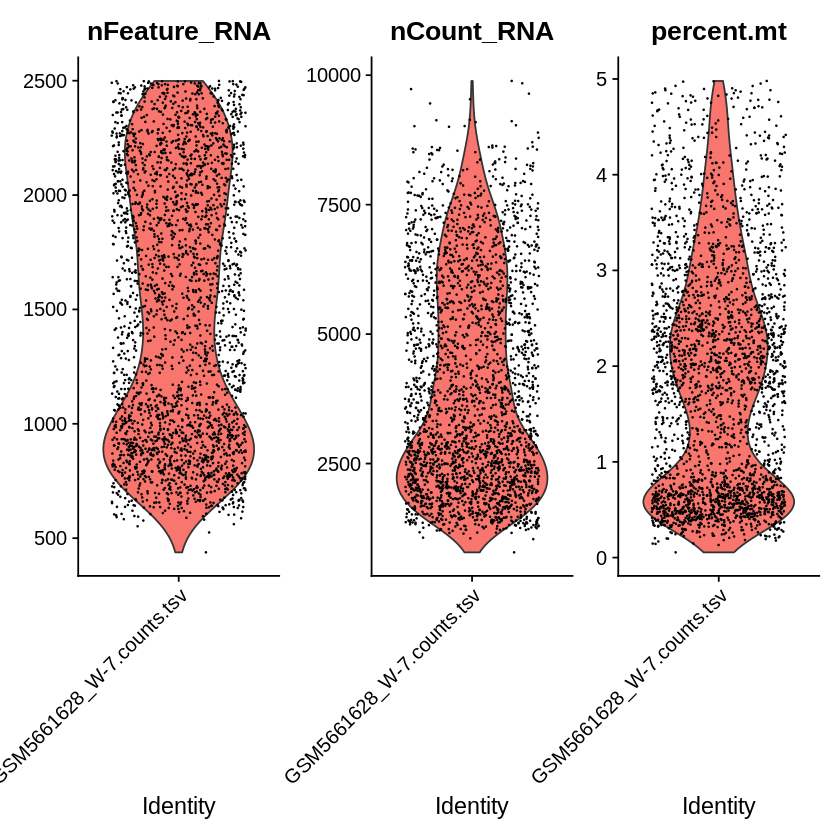

In [42]:
VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)


In [43]:
mice_data.list <- seurat_objects

In [44]:
names(mice_data.list)

[1] "GSM5661621_D-1.counts.tsv" "GSM5661622_D-3.counts.tsv"
[3] "GSM5661623_D-5.counts.tsv" "GSM5661624_D-7.counts.tsv"
[5] "GSM5661625_W-1.counts.tsv" "GSM5661626_W-3.counts.tsv"
[7] "GSM5661627_W-5.counts.tsv" "GSM5661628_W-7.counts.tsv"

In [45]:
save(mice_data.list, file = "mice_data.list.RData")


#select features for downstream intergration, PCA

In [46]:

mice_data.list <- lapply(X = mice_data.list, FUN = function(x) {
    x <- NormalizeData(x, verbose = FALSE)
    x <- FindVariableFeatures(x, verbose = FALSE)
})

In [47]:
features <- SelectIntegrationFeatures(object.list = mice_data.list) 


In [49]:
dat.anchors <- FindIntegrationAnchors(object.list = mice_data.list, anchor.features = features, normalization.method = "LogNormalize", dims = 1:15, reduction="cca") 
mice_cca.merged.obj <- IntegrateData(anchorset = dat.anchors)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9833 anchors

Filtering anchors

	Retained 4844 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8278 anchors

Filtering anchors

	Retained 4175 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8802 anchors

Filtering anchors

	Retained 5118 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5755 anchors

Filtering anchors

	Retained 3251 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6015 anchors

Filtering anchors

	Retained 3989 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6111 anchors

Fi

In [50]:
mice_cca.merged.obj$sample <- as.vector(sapply(mice_cca.merged.obj$orig.ident, function(x){strsplit(x, "_")[[1]][2]}))


In [51]:
DefaultAssay(mice_cca.merged.obj) <- "integrated" 


In [52]:

mice_cca.merged.obj <- ScaleData(mice_cca.merged.obj, verbose = FALSE)
mice_cca.merged.obj <- RunPCA(mice_cca.merged.obj, verbose = FALSE)

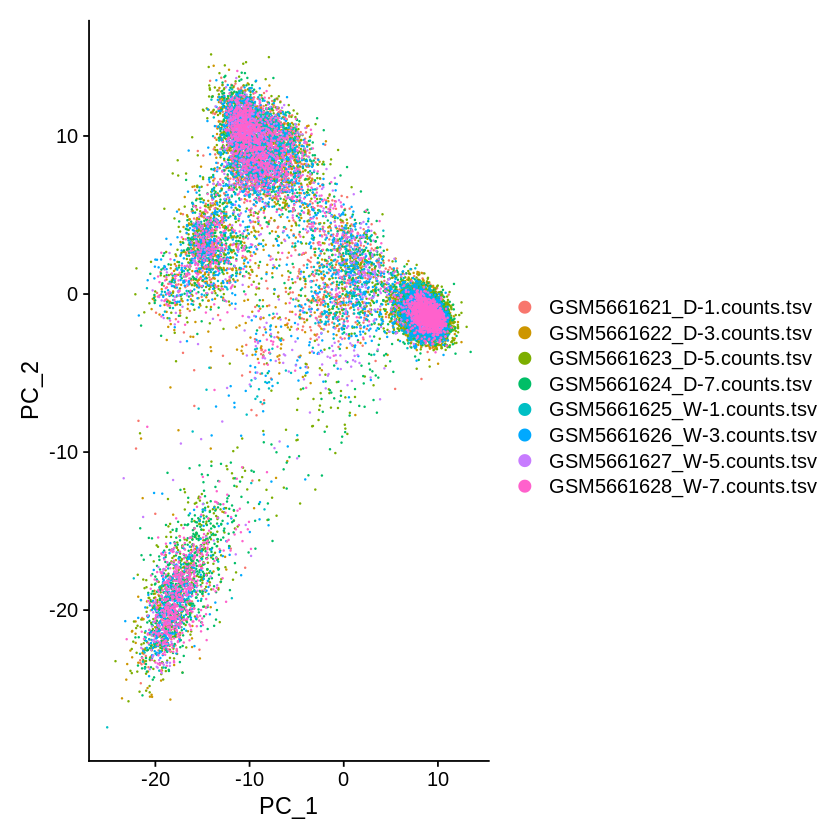

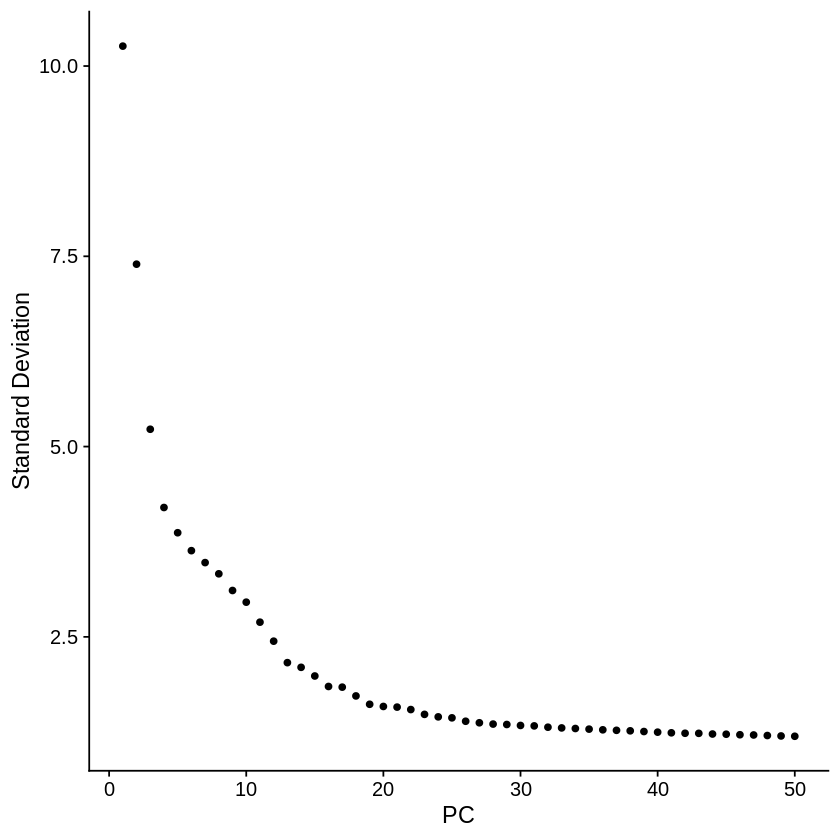

In [53]:


DimPlot(mice_cca.merged.obj, reduction = "pca")
ElbowPlot(mice_cca.merged.obj, ndims=50)



In [54]:
mice_cca.merged.obj <- FindNeighbors(mice_cca.merged.obj, reduction = "pca", dims = 1:15)
mice_cca.merged.obj <- FindClusters(mice_cca.merged.obj, resolution = 0.2)
mice_cca.merged.obj<- RunUMAP(mice_cca.merged.obj, reduction = "pca", dims = 1:15)
mice_cca.merged.obj <- RunTSNE(mice_cca.merged.obj, reduction = "pca", dims = 1:15)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 25063
Number of edges: 955325

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9425
Number of communities: 10
Elapsed time: 5 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:53:57 UMAP embedding parameters a = 0.9922 b = 1.112

16:53:57 Read 25063 rows and found 15 numeric columns

16:53:57 Using Annoy for neighbor search, n_neighbors = 30

16:53:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:53:59 Writing NN index file to temp file /tmp/RtmpJpbVND/file33f123b05e32

16:53:59 Searching Annoy index using 1 thread, search_k = 3000

16:54:05 Annoy recall = 100%

16:54:05 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

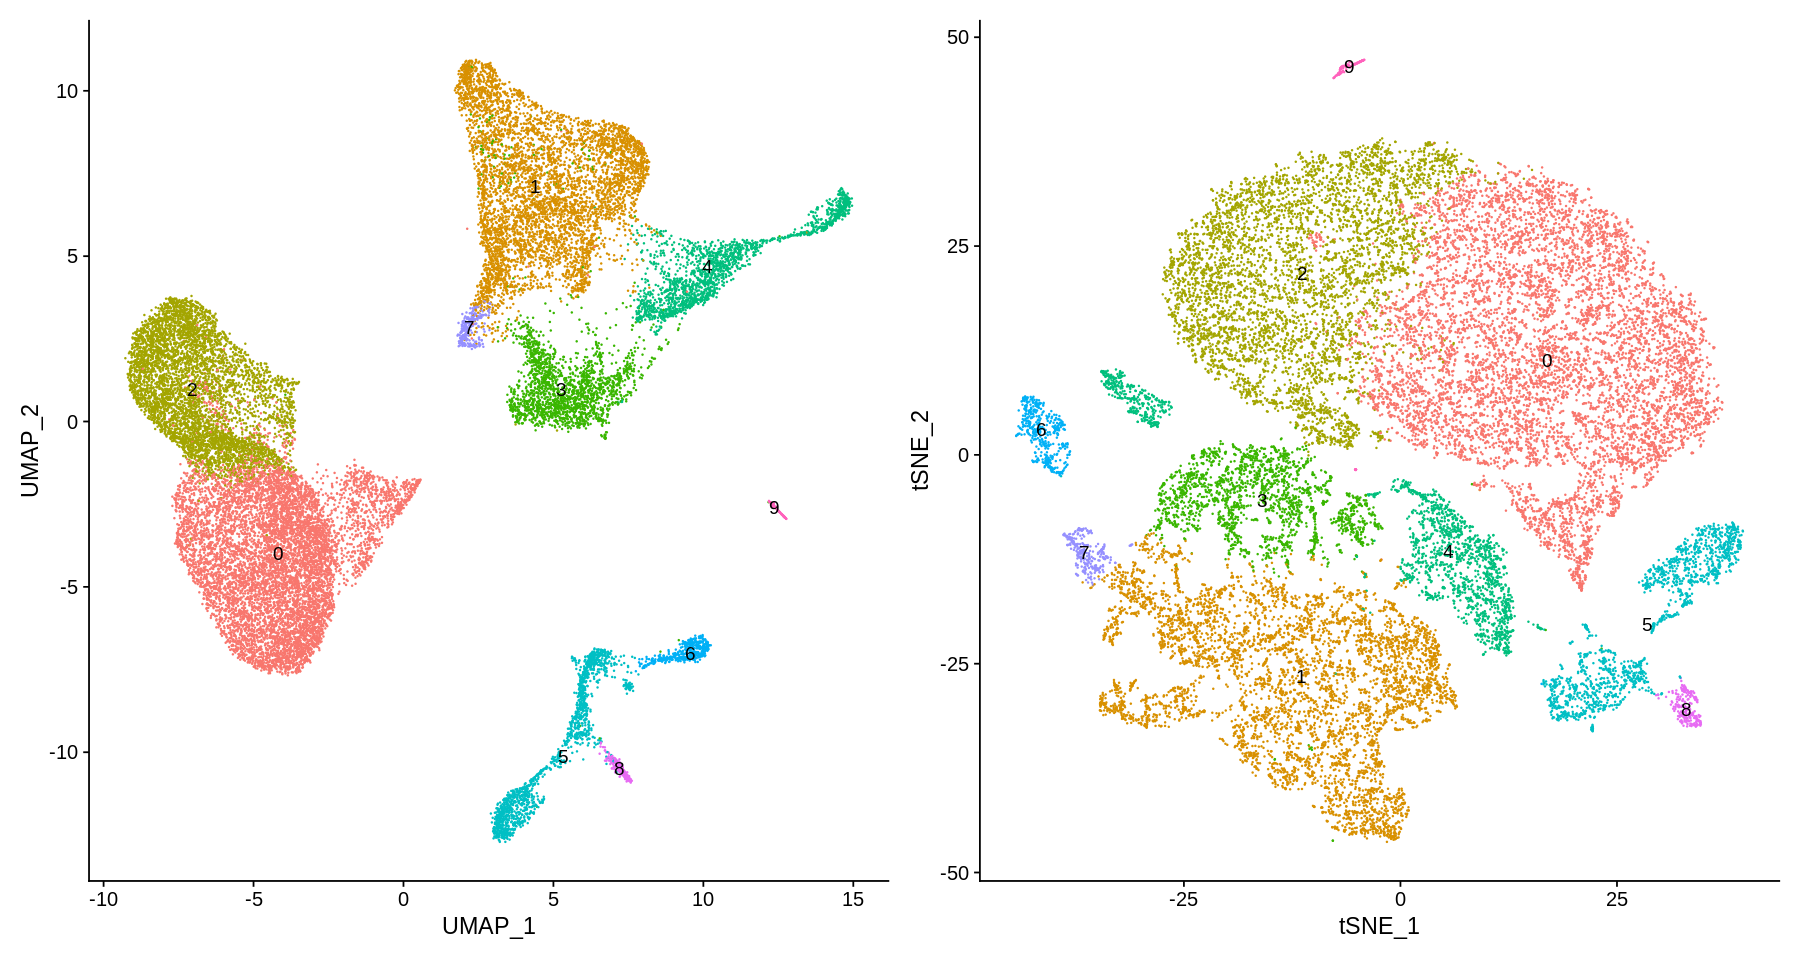

In [57]:
options(repr.plot.width = 15, repr.plot.height = 8)
p1 <- DimPlot(mice_cca.merged.obj, reduction = "umap", label=T) + NoLegend()
p2 <- DimPlot(mice_cca.merged.obj, reduction = "tsne", label=T) + NoLegend()
p1+p2


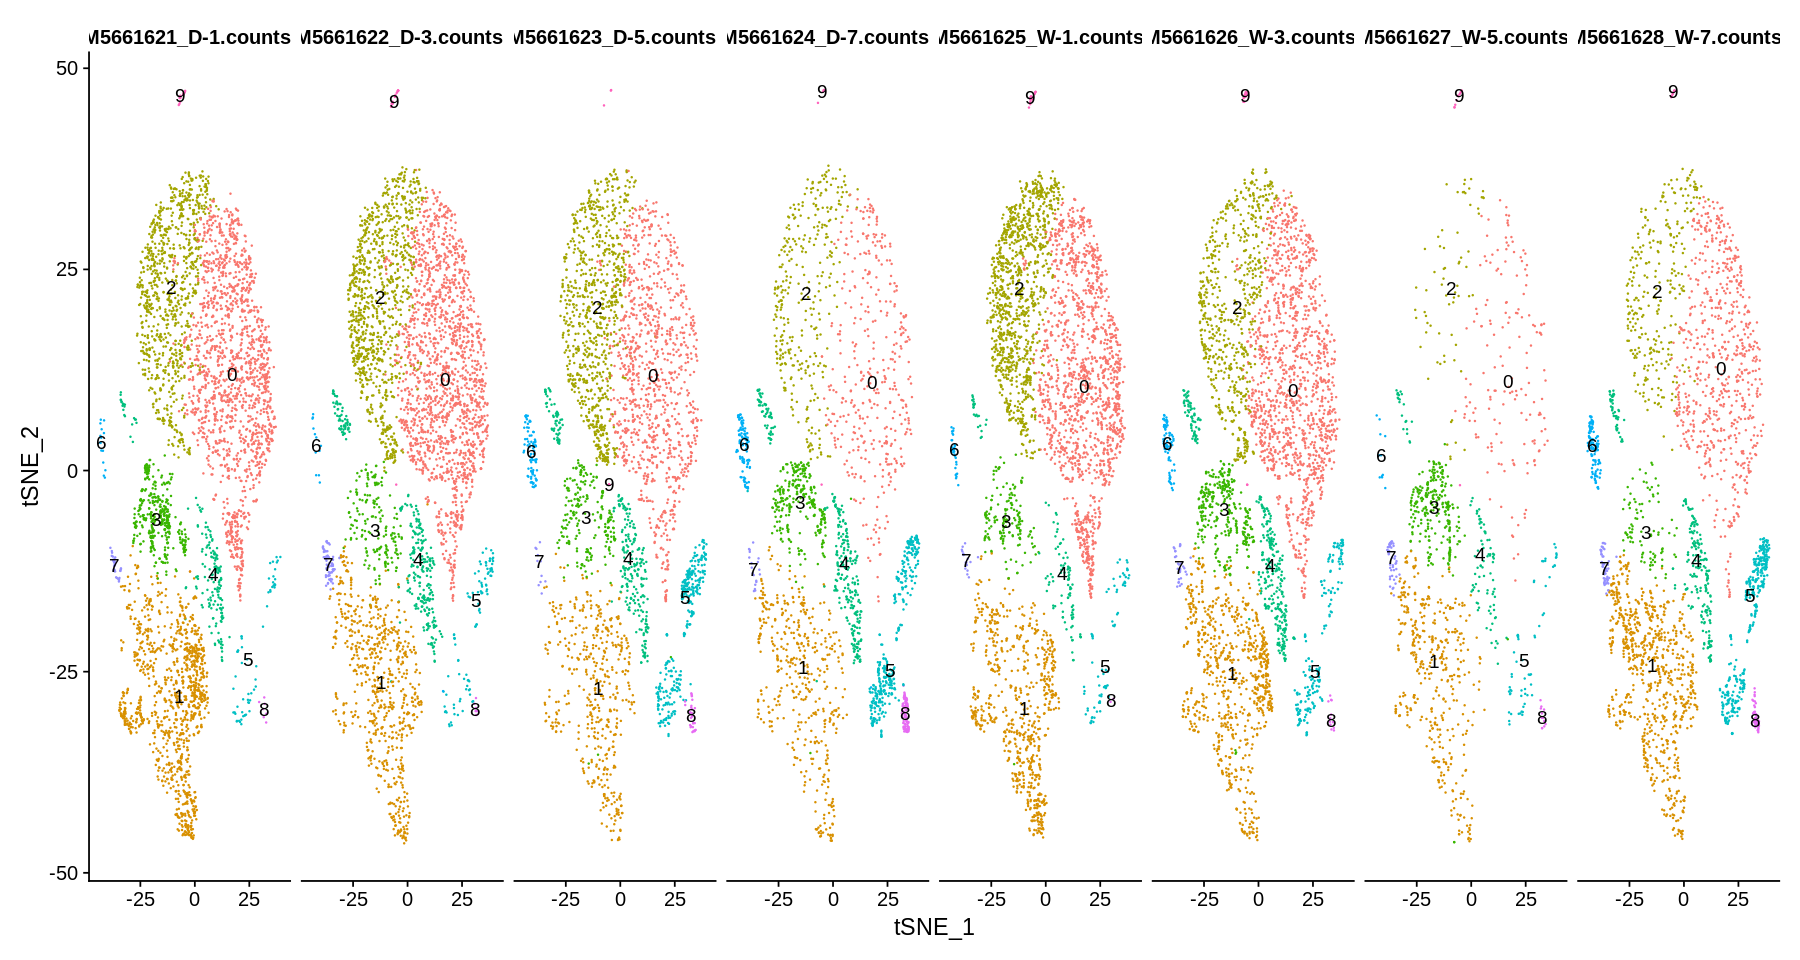

In [58]:
options(repr.plot.width = 15, repr.plot.height = 8)
p3 <- DimPlot(mice_cca.merged.obj, reduction = "tsne", label=T,  split.by = "orig.ident") + NoLegend()
p3

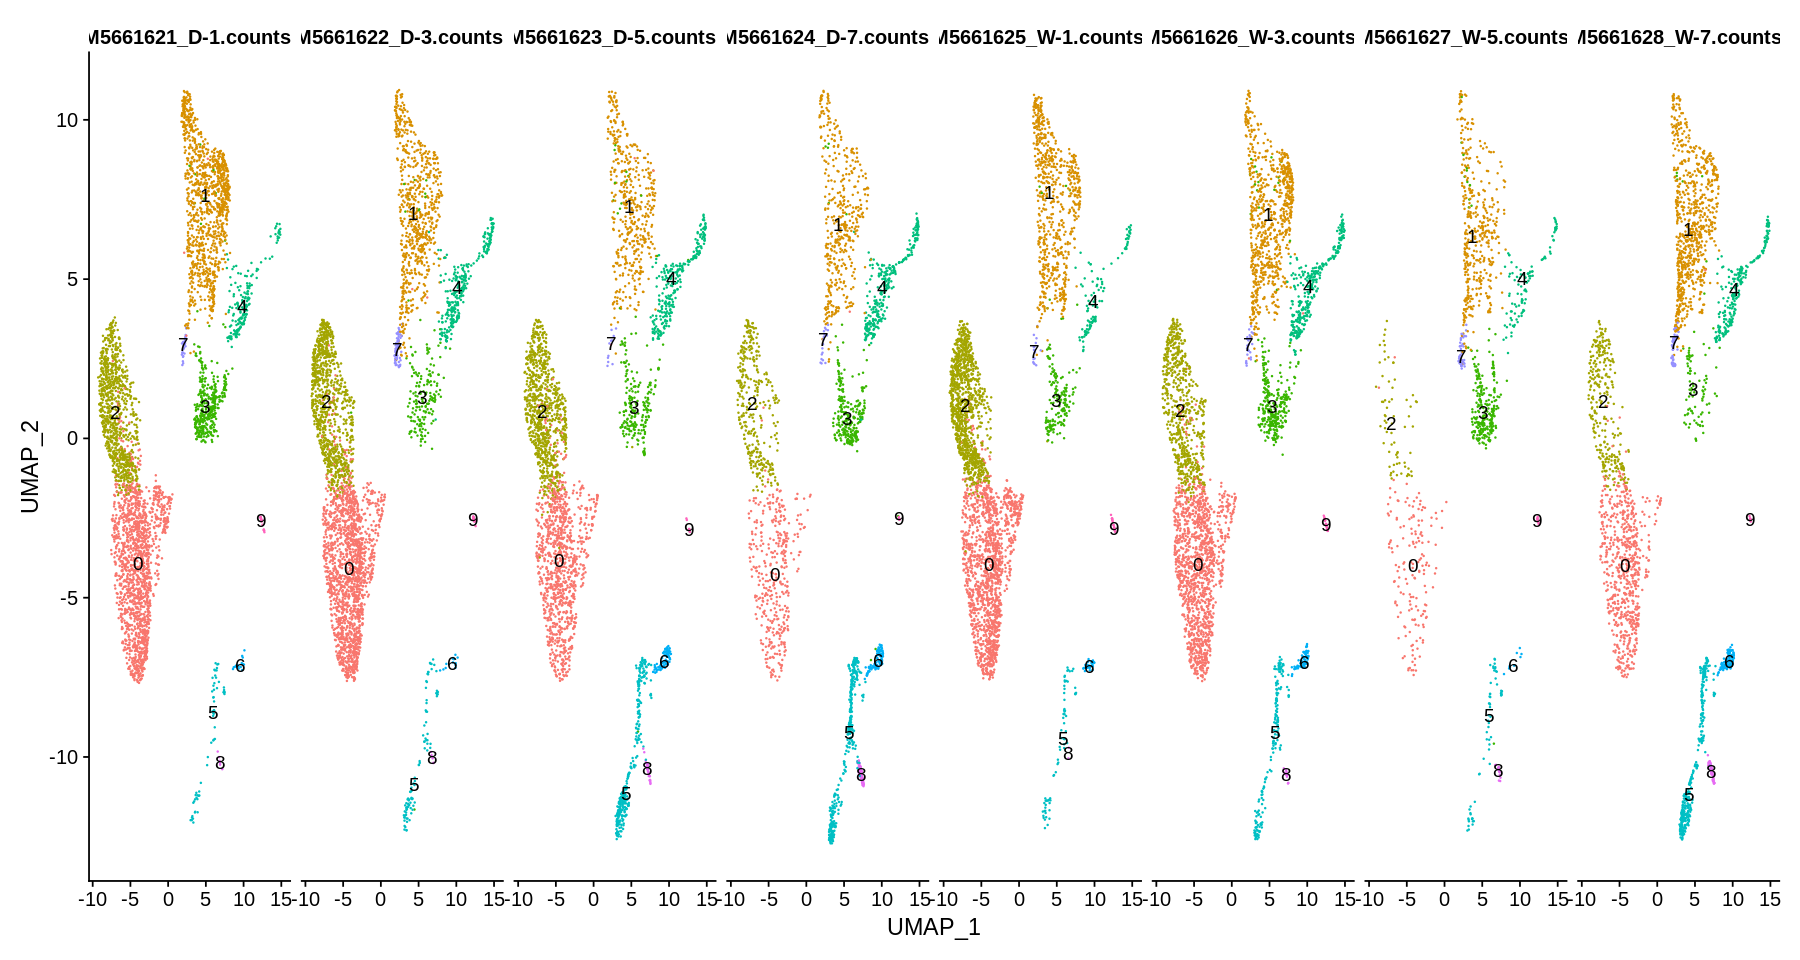

In [59]:
options(repr.plot.width = 15, repr.plot.height = 8)
p4 <- DimPlot(mice_cca.merged.obj, reduction = "umap", label=T,  split.by = "orig.ident") + NoLegend()
p4

In [60]:
ggsave("/data2/ZenNa/mice_count_data/Result/aallgroups_tsne_splitbySample.png", p3,  width = 10, height = 5, units = "in")
ggsave("/data2/ZenNa/mice_count_data/Result/allgroups_tsne.png", p2,  width = 5, height = 5, units = "in")

In [62]:
ggsave("/data2/ZenNa/mice_count_data/Result/allgroups_UMAP.png", p1,  width = 5, height = 5, units = "in")
ggsave("/data2/ZenNa/mice_count_data/Result/allgroups_UMAPD split.png", p4,  width = 5, height = 5, units = "in")

In [63]:
ggsave("/data2/ZenNa/mice_count_data/Result/allgroups_UMAPD split.png", p4,  width = 10, height = 5, units = "in")

# Look at cluster IDs of the first 5 cells

In [64]:
head(mice_cca.merged.obj@meta.data)

orig.ident                nCount_RNA nFeature_RNA percent.mt
C1_1 GSM5661621_D-1.counts.tsv 4455       1189         0.31425365
C2_1 GSM5661621_D-1.counts.tsv 3063        843         0.09794319
C4_1 GSM5661621_D-1.counts.tsv 1931        603         0.15535992
C5_1 GSM5661621_D-1.counts.tsv 4328       1380         2.88817006
C6_1 GSM5661621_D-1.counts.tsv 6439       1905         1.56856655
C8_1 GSM5661621_D-1.counts.tsv 9116       2057         1.83194384
     sample         integrated_snn_res.0.2 seurat_clusters
C1_1 D-1.counts.tsv 2                      2              
C2_1 D-1.counts.tsv 2                      2              
C4_1 D-1.counts.tsv 0                      0              
C5_1 D-1.counts.tsv 1                      1              
C6_1 D-1.counts.tsv 4                      4              
C8_1 D-1.counts.tsv 1                      1

In [65]:
table(mice_cca.merged.obj$seurat_clusters)



   0    1    2    3    4    5    6    7    8    9 
8292 5321 5153 1939 1792 1486  454  275  228  123 

In [66]:
table(Idents(mice_cca.merged.obj))


   0    1    2    3    4    5    6    7    8    9 
8292 5321 5153 1939 1792 1486  454  275  228  123 

In [67]:
install.packages('dplyr')
install.packages('limma')
install.packages('magrittr')


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘limma’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [68]:
library(limma)
library(dplyr)
library(magrittr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [69]:
logFCfilter=0.25
adjPvalfilter=0.05
cluster.markers <- FindAllMarkers(obj=mice_cca.merged.obj,
                                only.pos=FALSE,
                                min.pct=0.25,
                                logfc.thrshold=logFCfilter)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [70]:
install.packages("writexl")
library("writexl")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [71]:
library(openxlsx)

In [72]:
sig.markers <- cluster.markers[(abs(as.numeric(as.vector(cluster.markers$avg_log2FC))))>logFCfilter & as.numeric((as.vector(cluster.markers$p_val_adj))<adjPvalfilter),]


In [73]:
file_path_2 <- "/data2/ZenNa/mice_count_data/Result/cluster.marker.xlsx"


In [74]:
write_xlsx(sig.markers, path = file_path_2)

In [75]:
top10 <- cluster.markers %>% group_by(cluster) %>% top_n(n=10,wt=avg_log2FC)

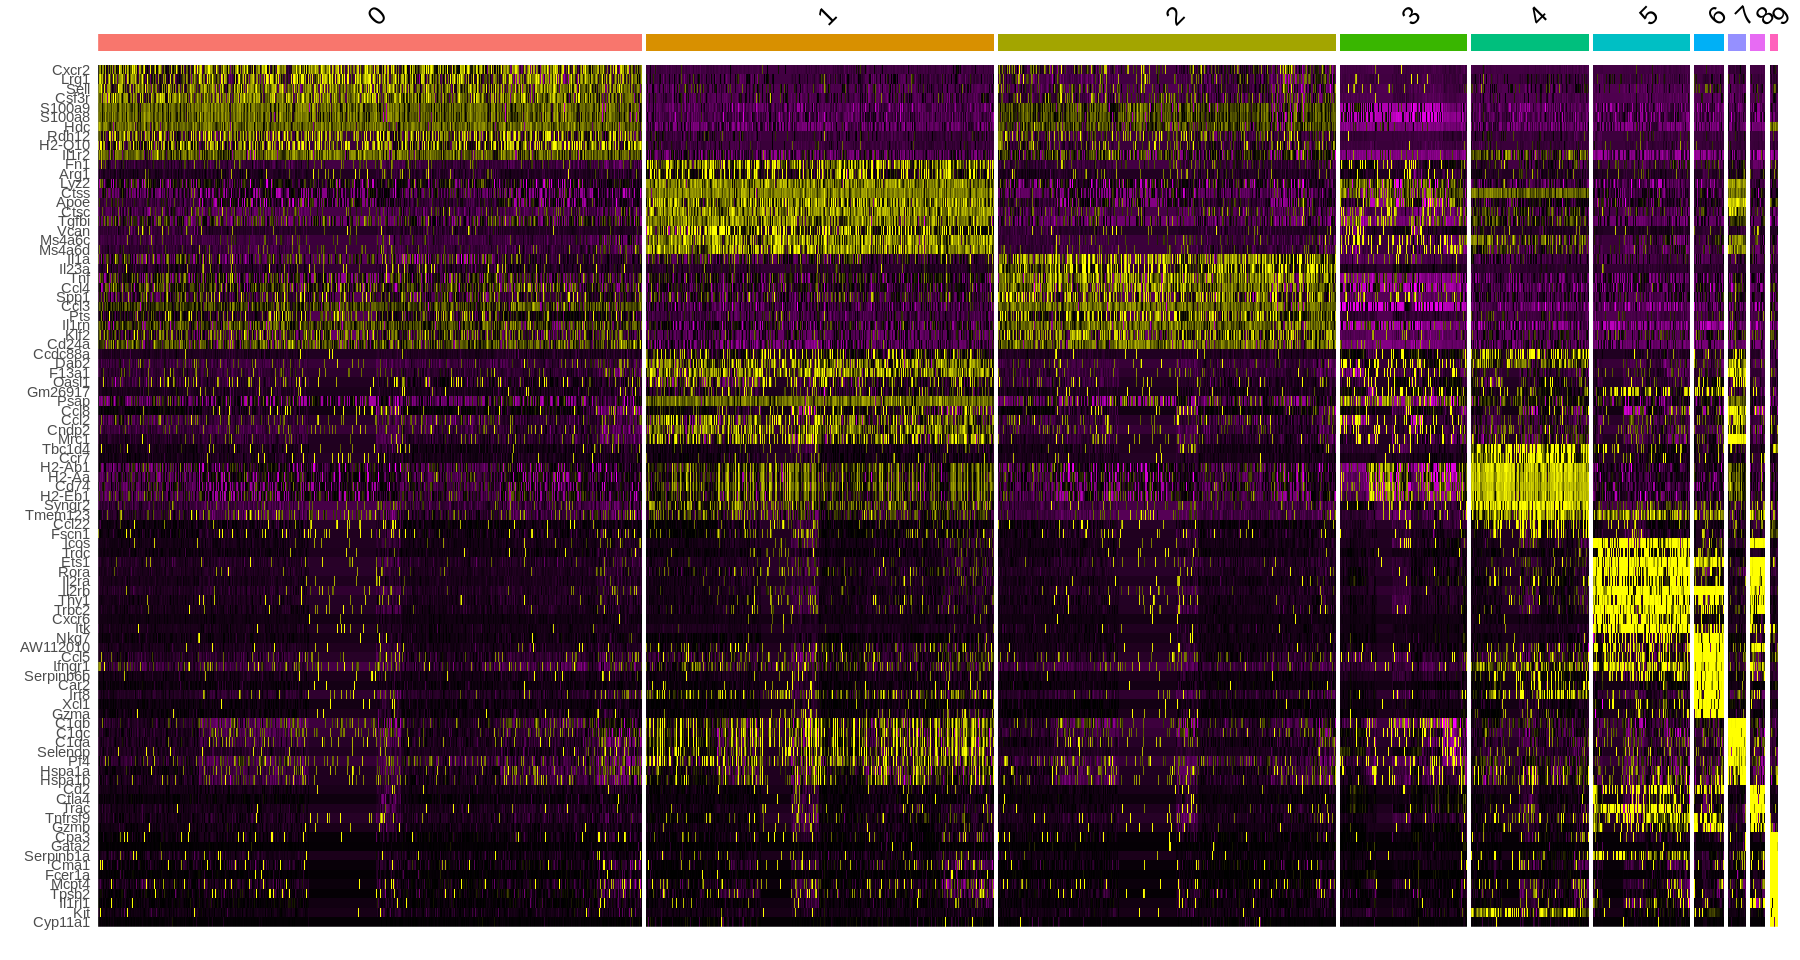

In [76]:
DoHeatmap(obj = mice_cca.merged.obj, features = top10$gene) + NoLegend()


In [77]:
p5 <- DoHeatmap(obj = mice_cca.merged.obj, features = top10$gene) + NoLegend()


In [78]:
ggsave("/data2/ZenNa/mice_count_data/Result/allgroups_top10heatmap.png", p5,  width = 20, height = 15, units = "in")

In [88]:
write.csv(top10,file=("/data2/ZenNa/mice_count_data/Result/allgroups_top10.csv"),  quote = TRUE, row.names = TRUE)

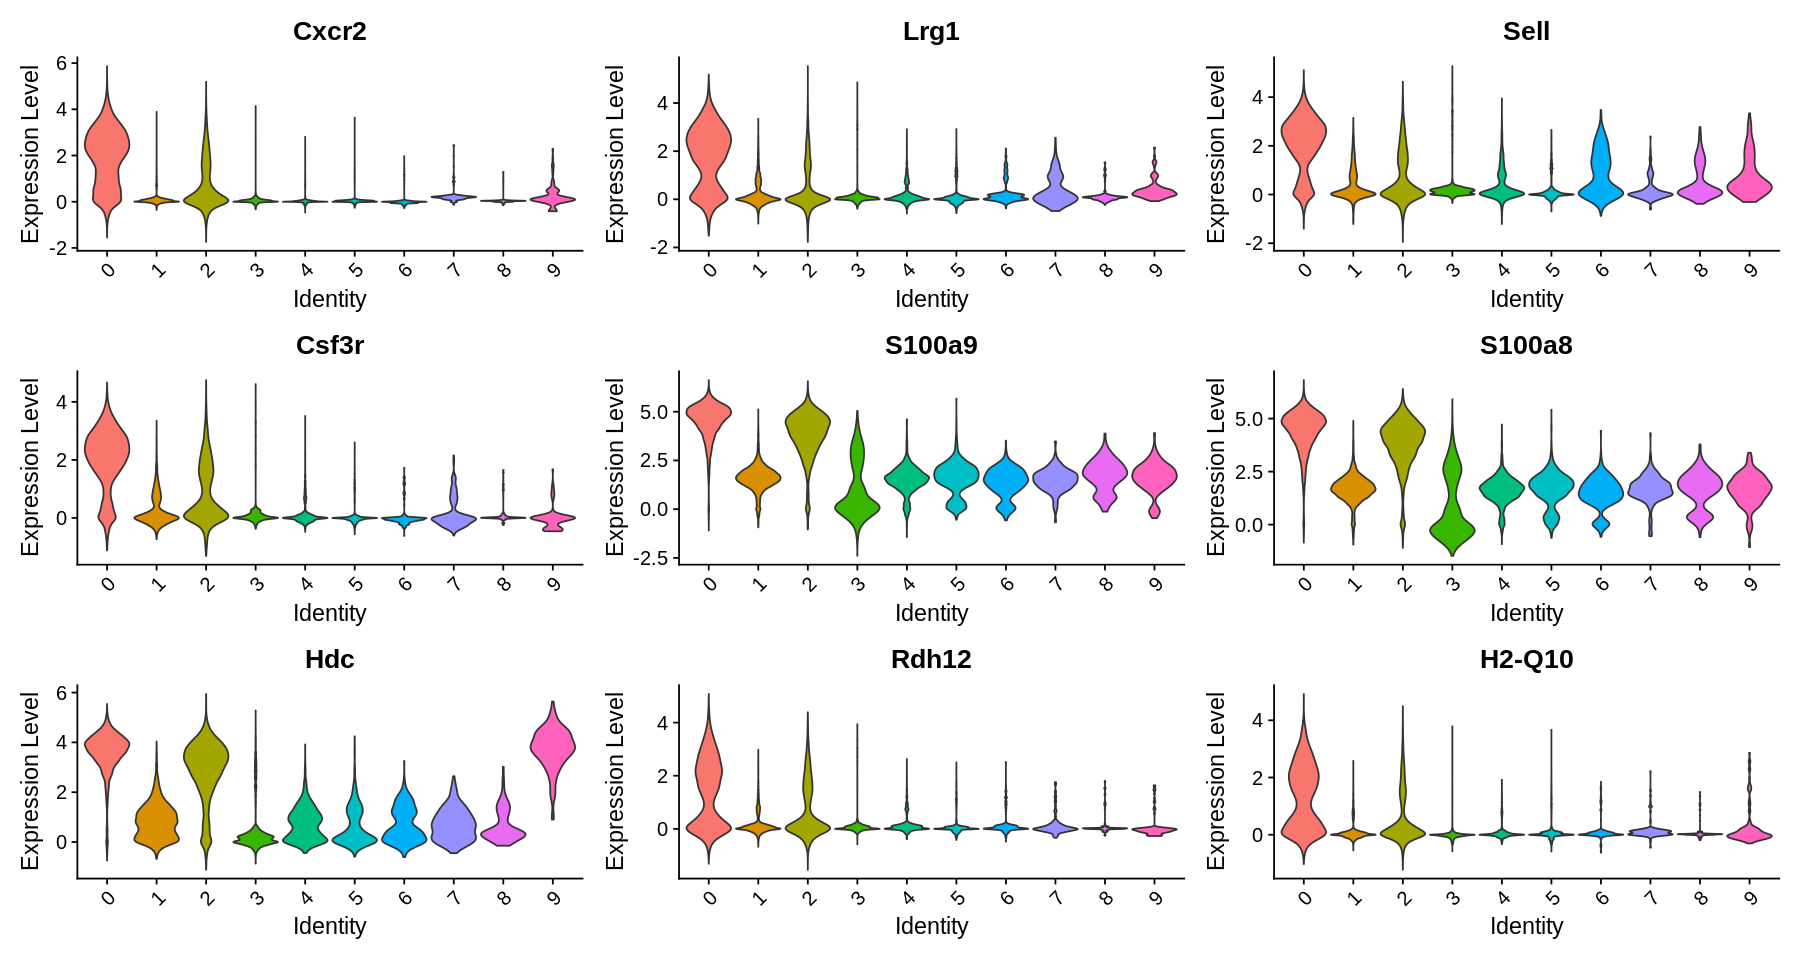

In [89]:
VlnPlot(obj = mice_cca.merged.obj, features = c("Cxcr2","Lrg1","Sell","Csf3r","S100a9","S100a8","Hdc","Rdh12","H2-Q10"),pt.size=0)


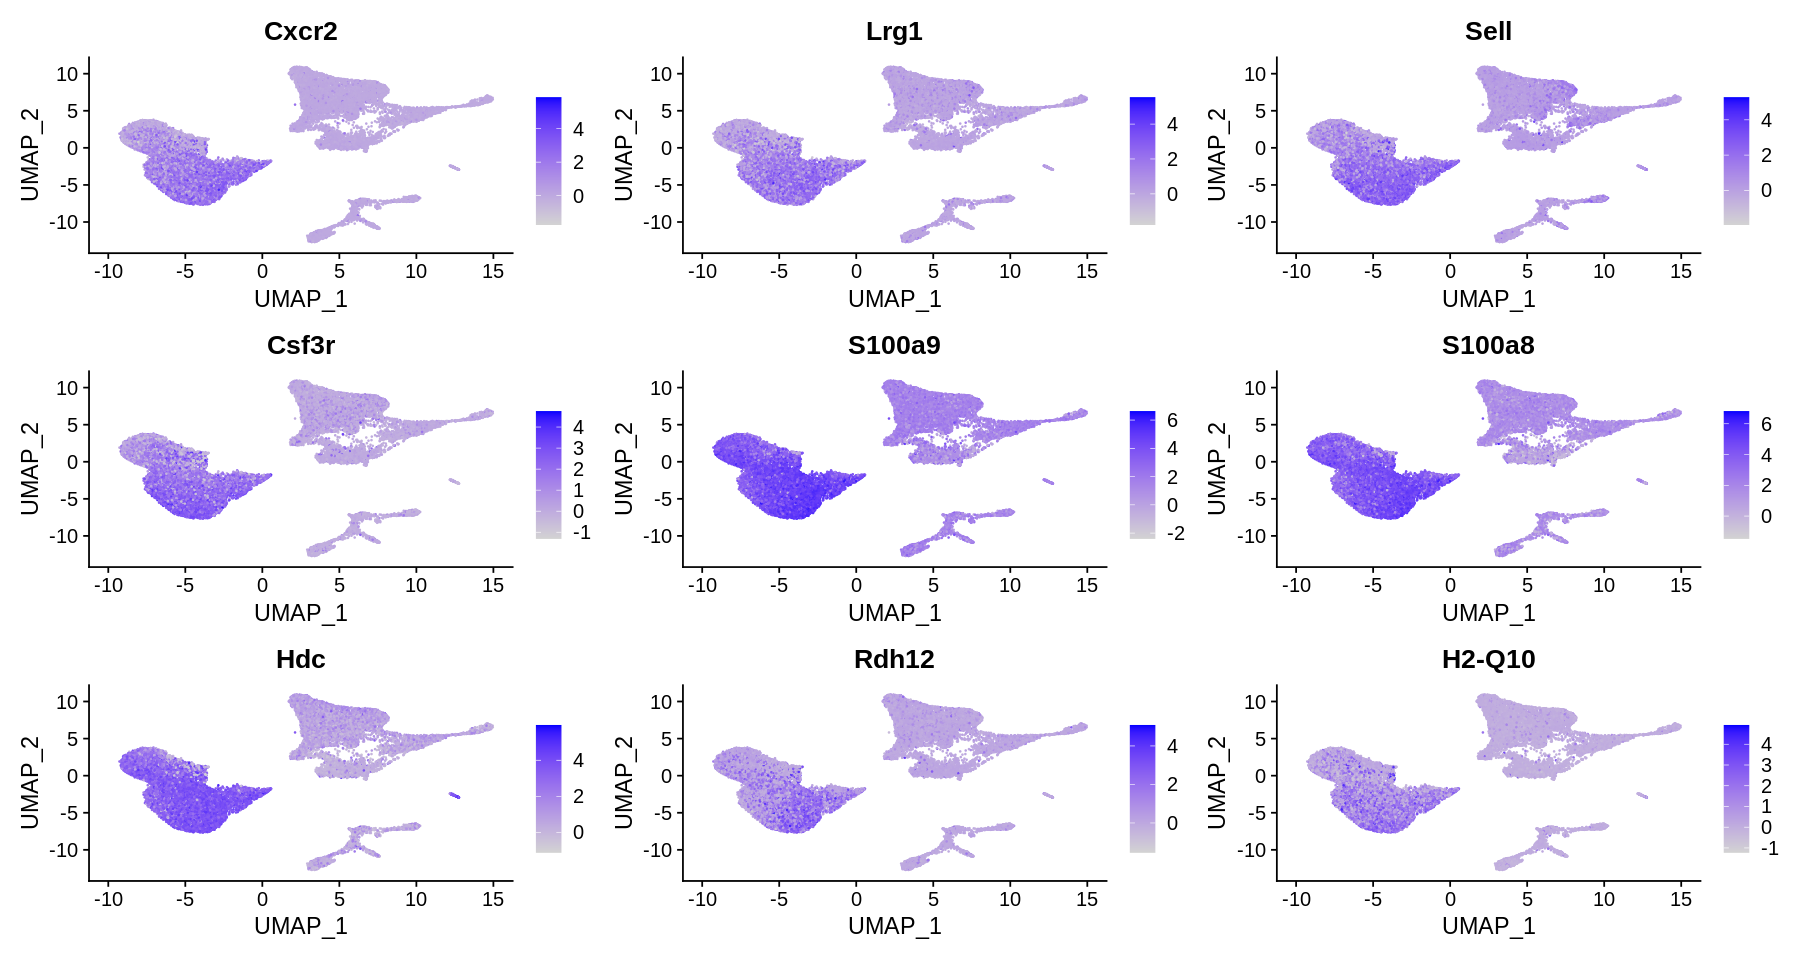

In [91]:
FeaturePlot(obj = mice_cca.merged.obj, features = c("Cxcr2","Lrg1","Sell","Csf3r","S100a9","S100a8","Hdc","Rdh12","H2-Q10"),pt.size=0.1)


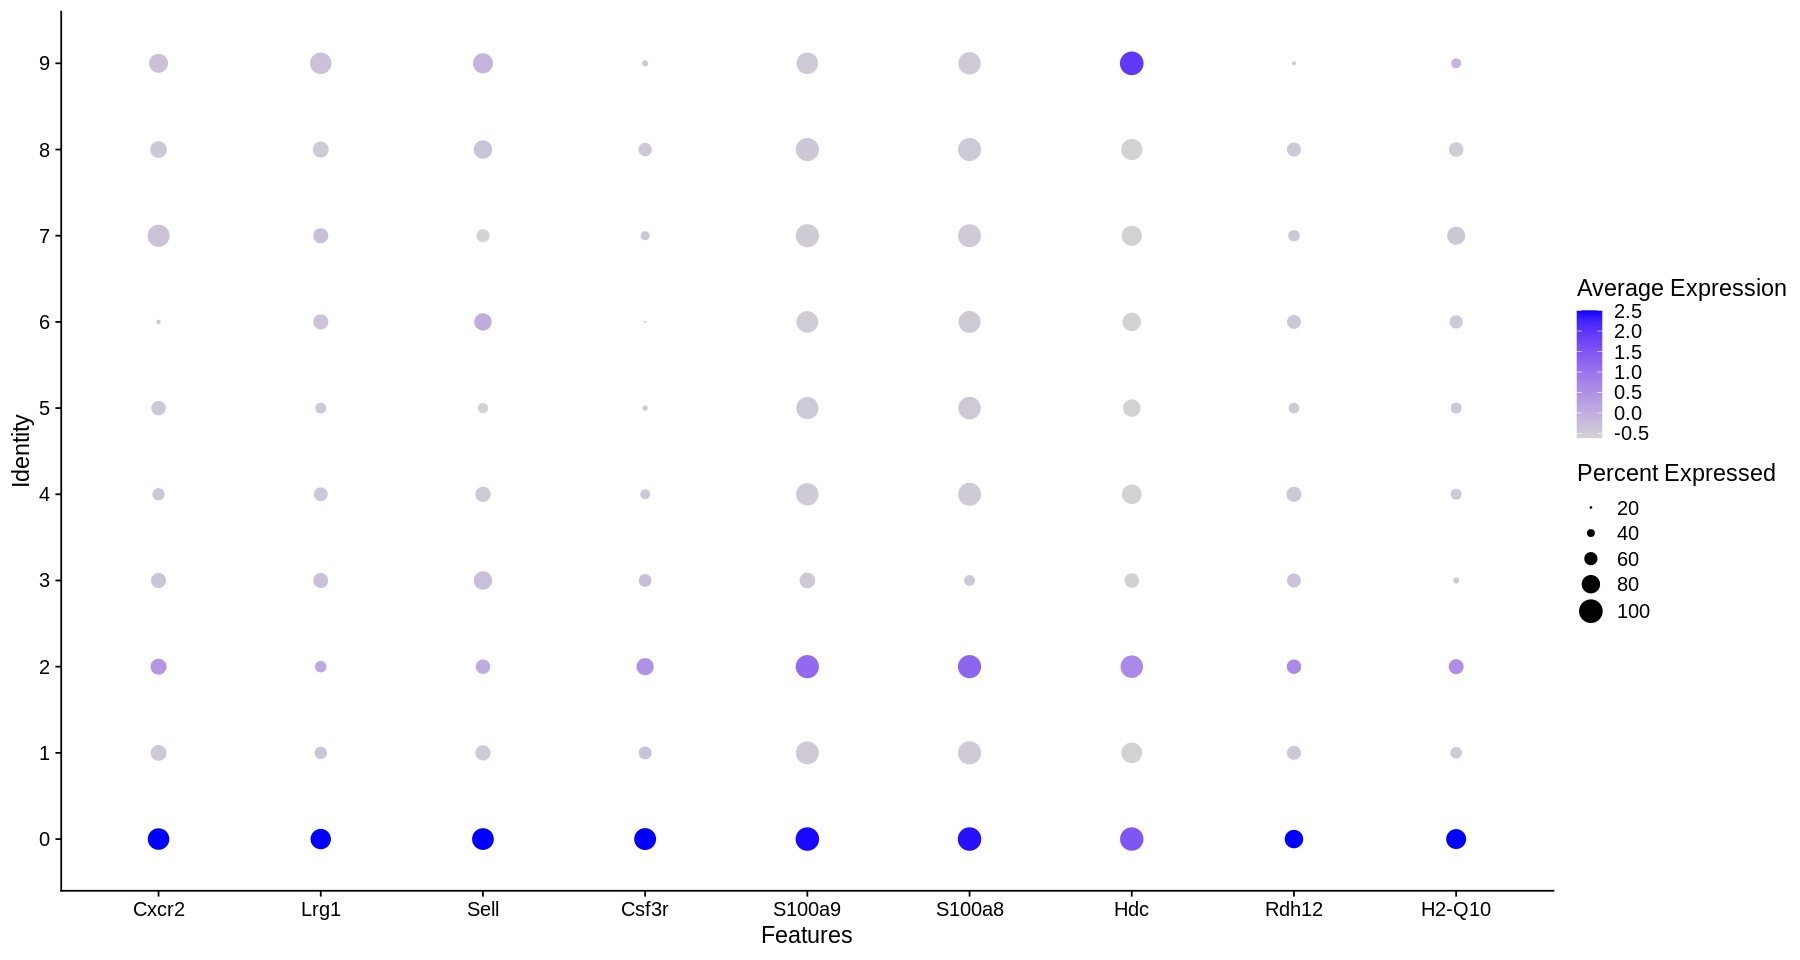

In [92]:
cluster0Markert= c("Cxcr2","Lrg1","Sell","Csf3r","S100a9","S100a8","Hdc","Rdh12","H2-Q10")
DotPlot(obj = mice_cca.merged.obj,features = cluster0Markert )

In [93]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("celldex")

Bioconductor version '3.16' is out-of-date; the current release version '3.17'
  is available with R version '4.3'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'celldex'”
Old packages: 'dbplyr', 'gert', 'harmony', 'knitr', 'lubridate', 'Matrix',
  'openssl', 'pkgload', 'polyclip', 'prettyunits', 'RcppArmadillo',
  'reticulate', 'rmarkdown', 'sctransform', 'Seurat', 'SeuratObject',
  'spatstat.random', 'withr'



In [94]:
BiocManager::install("BiocParallel")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'BiocParallel'”
Old packages: 'dbplyr', 'gert', 'harmony', 'knitr', 'lubridate', 'Matrix',
  'openssl', 'pkgload', 'polyclip', 'prettyunits', 'RcppArmadillo',
  'reticulate', 'rmarkdown', 'sctransform', 'Seurat', 'SeuratObject',
  'spatstat.random', 'withr'



In [95]:
BiocManager::install("SingleR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'SingleR'”
Old packages: 'dbplyr', 'gert', 'harmony', 'knitr', 'lubridate', 'Matrix',
  'openssl', 'pkgload', 'polyclip', 'prettyunits', 'RcppArmadillo',
  'reticulate', 'rmarkdown', 'sctransform', 'Seurat', 'SeuratObject',
  'spatstat.random', 'withr'



In [96]:
library(celldex)
immgen <-ImmGenData()
library(SingleR)
library(BiocParallel)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

In [97]:
pred.cca.merged.obj <- SingleR(test = mice_cca.merged.obj@assays$RNA@data,ref = immgen,labels = immgen$label.fine,clusters = mice_cca.merged.obj@active.ident,fine.tune = TRUE,BPPARAM = SnowParam(40) )
pred.cca.merged.obj$pruned.labels

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames =

[1] "Neutrophils (GN.ARTH)"        "Monocytes (MO.6C+II-)"       
 [3] "Neutrophils (GN.Thio)"        "Macrophages (MF.103-11B+24-)"
 [5] "DC (DC.103-11B+24+)"          "Tgd (Tgd.mat.VG2+)"          
 [7] "ILC (LPL.NCR+CNK)"            "Macrophages (MF.11C-11B+)"   
 [9] "T cells (T.Tregs)"            "Mast cells (MC.TO)"

In [98]:
pdf(file="allgroupscelllablemicedata",width=10,height=10)


In [99]:
install.packages("viridis")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [100]:
library(viridis)

Loading required package: viridisLite



In [101]:
install.packages("pheatmap")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [102]:
library(pheatmap)


Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


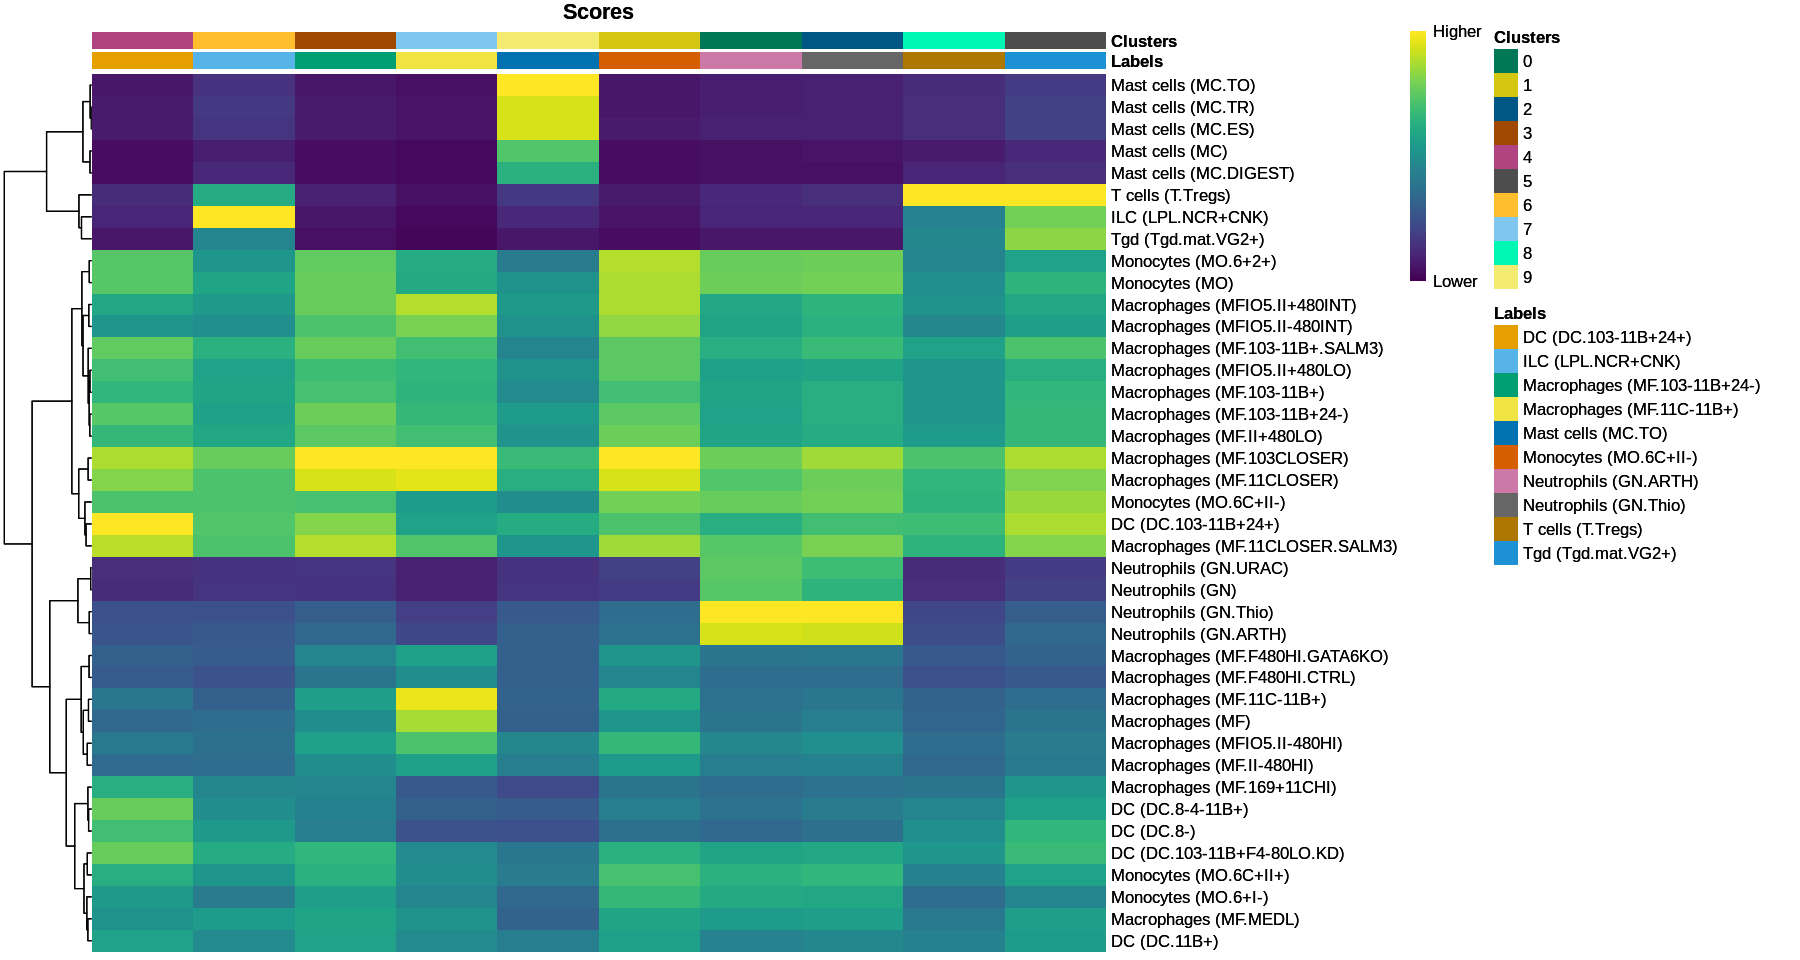

In [103]:
plotScoreHeatmap(pred.cca.merged.obj,clusters = pred.cca.merged.obj@rownames,fontsize.row=9,show_colnames = F )


In [104]:
allgroupmarker <- subset(cluster.markers,p_val=0)


In [105]:
allgroupmarker

p_val       avg_log2FC pct.1 pct.2 p_val_adj cluster
Cxcr2         0           2.626771   0.920 0.673 0         0      
Lrg1          0           2.496345   0.874 0.581 0         0      
Sell          0           2.362908   0.927 0.669 0         0      
Csf3r         0           2.320564   0.933 0.584 0         0      
S100a9        0           2.235381   0.996 0.937 0         0      
S100a8        0           2.125698   0.995 0.921 0         0      
Hdc           0           2.058499   0.990 0.863 0         0      
Rdh12         0           2.033725   0.801 0.623 0         0      
H2-Q10        0           1.950050   0.857 0.554 0         0      
Il1r2         0           1.948526   0.989 0.903 0         0      
Slfn4         0           1.919909   0.990 0.922 0         0      
Retnlg        0           1.913891   0.746 0.511 0         0      
Mcemp1        0           1.845338   0.917 0.750 0         0      
Hp            0           1.809295   0.816 0.561 0         0      
Trem1         0           1.800004   0.964 0.835 0         0      
Mmp9          0           1.718870   0.778 0.517 0         0      
Sh2d3c        0           1.698845   0.934 0.802 0         0      
Il1f9         0           1.382972   0.919 0.731 0         0      
Acod1         0           1.344896   0.988 0.873 0         0      
Cd300lf       0           1.314077   0.927 0.822 0         0      
Lcn2          0           1.307254   0.911 0.762 0         0      
Fpr2          0           1.273064   0.916 0.742 0         0      
Wfdc21        0           1.270906   0.687 0.537 0         0      
Osgin1        0           1.267305   0.834 0.618 0         0      
Stfa2l1       0           1.240463   0.851 0.725 0         0      
G0s2          0           1.219193   0.861 0.765 0         0      
Asprv1        0           1.169783   0.862 0.831 0         0      
Slc7a11       0           1.101250   0.977 0.892 0         0      
Dgat2         0           1.098041   0.853 0.702 0         0      
Ogfrl1        0           1.085376   0.758 0.552 0         0      
⋮             ⋮           ⋮          ⋮     ⋮     ⋮         ⋮      
Serpinb8.8    0.001563704 -0.4994431 0.675 0.576 1         9      
Ctss.9        0.001603936 -1.7093157 0.967 0.898 1         9      
Gramd3.6      0.001762489 -0.3317660 0.732 0.692 1         9      
Myof.7        0.001888568 -0.2756063 0.715 0.525 1         9      
Isg20.7       0.001903382 -0.3676643 0.463 0.603 1         9      
Gnb4.2        0.002026206  0.9007691 0.569 0.625 1         9      
Zbtb10.4      0.002105131  0.7278363 0.585 0.588 1         9      
Retnlg.7      0.002202585 -1.4880045 0.553 0.589 1         9      
Fos.5         0.002493612  0.3480235 0.886 0.855 1         9      
Mmp19.7       0.002566876 -0.4409810 0.593 0.600 1         9      
Dgat1.8       0.002680505 -1.2065020 0.780 0.822 1         9      
Klrc1.7       0.002807254 -0.2836841 0.780 0.699 1         9      
Elovl5.6      0.002906143 -0.2985235 0.854 0.817 1         9      
Oasl1.8       0.002988859 -0.7884003 0.496 0.508 1         9      
Ifi47.4       0.003179925 -0.2715061 0.472 0.566 1         9      
Nrp2.9        0.003380580 -0.6027489 0.561 0.566 1         9      
1700006J14Rik 0.003411048  0.4060384 0.398 0.426 1         9      
Pcp4l1        0.003885615  0.4076348 0.528 0.356 1         9      
Mgst1.6       0.004167053 -0.5665262 0.772 0.604 1         9      
Ccdc141       0.004427883  0.3257307 0.398 0.231 1         9      
Il18r1.6      0.005408902  0.5933869 0.691 0.645 1         9      
P2ry10.8      0.005736721 -0.5157515 0.545 0.721 1         9      
Rhou.6        0.006190704 -0.3863955 0.780 0.635 1         9      
Flnb.3        0.006280027  1.1285448 0.415 0.566 1         9      
Anxa2.9       0.007098258 -0.6838407 0.911 0.867 1         9      
Egln3.6       0.007698953 -0.4637571 0.699 0.715 1         9      
Tarm1.5       0.008488049 -0.2995075 0.496 0.568 1         9      
Tnfsf9.7      0.008716651 -0.6737357 0.561 0.575 1         9 

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


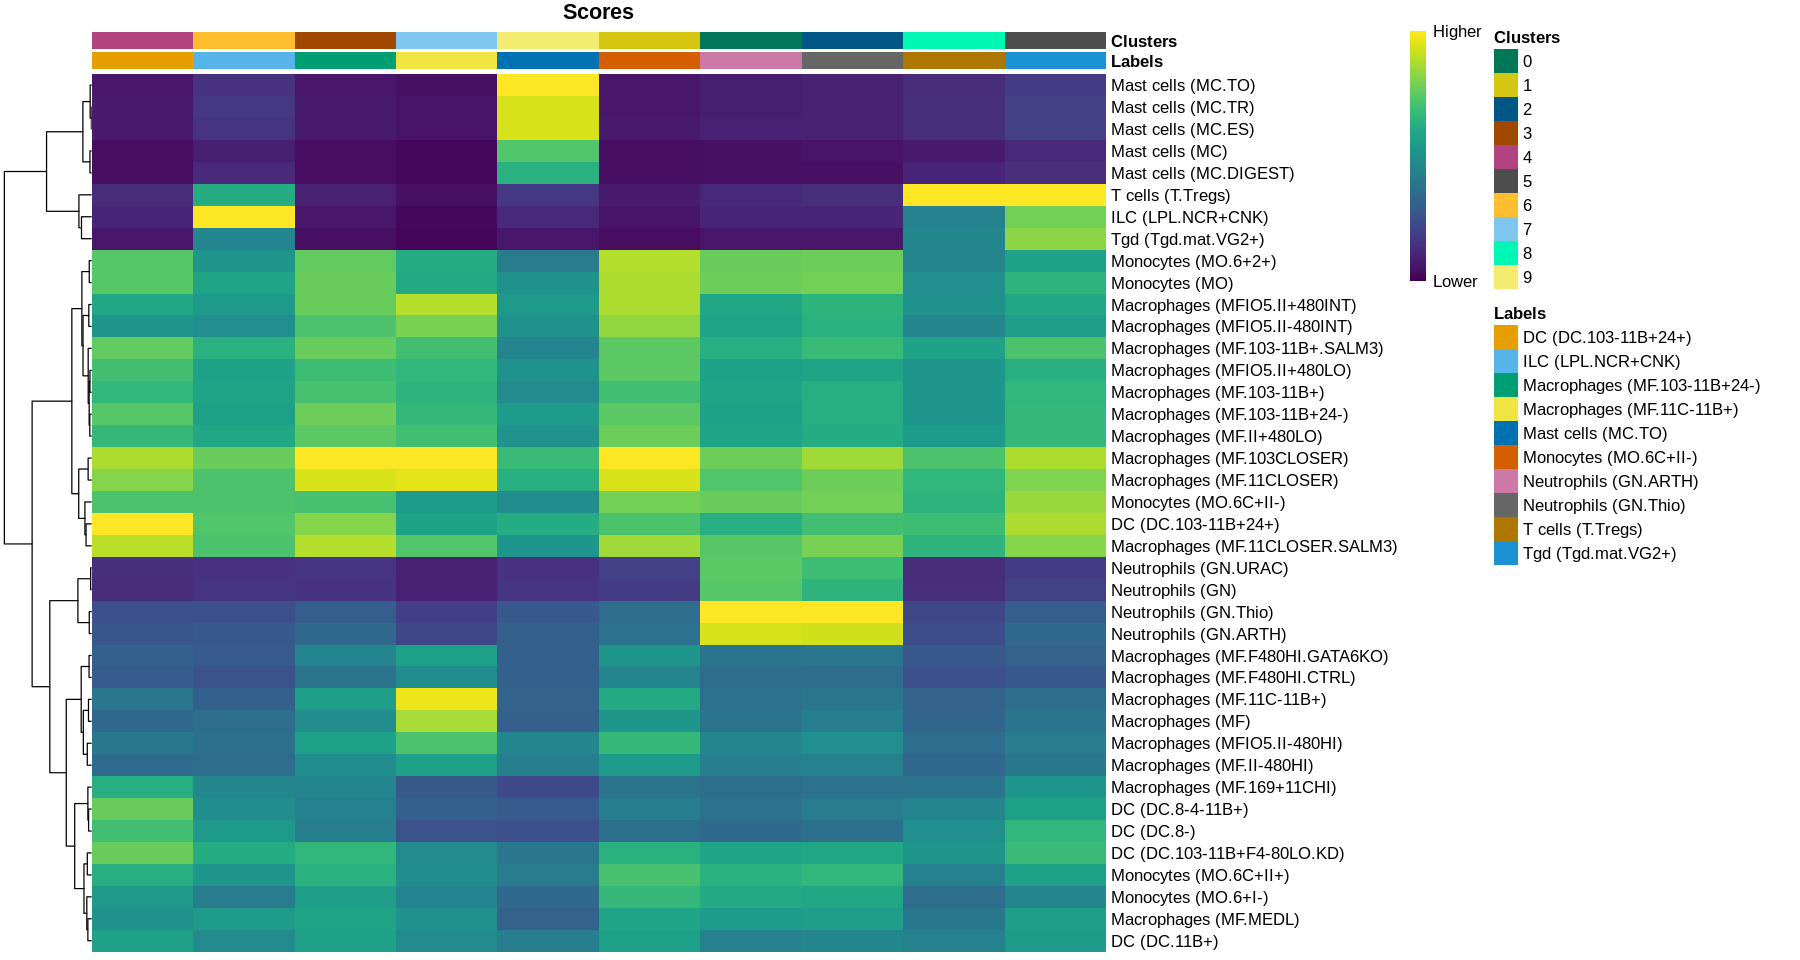

In [107]:
p6 <- plotScoreHeatmap(pred.cca.merged.obj,clusters = pred.cca.merged.obj@rownames,fontsize.row=9,show_colnames = F )


In [108]:
ggsave("/data2/ZenNa/mice_count_data/Result/allgrouppredictcluster.png", p6,  width = 20, height = 15, units = "in")

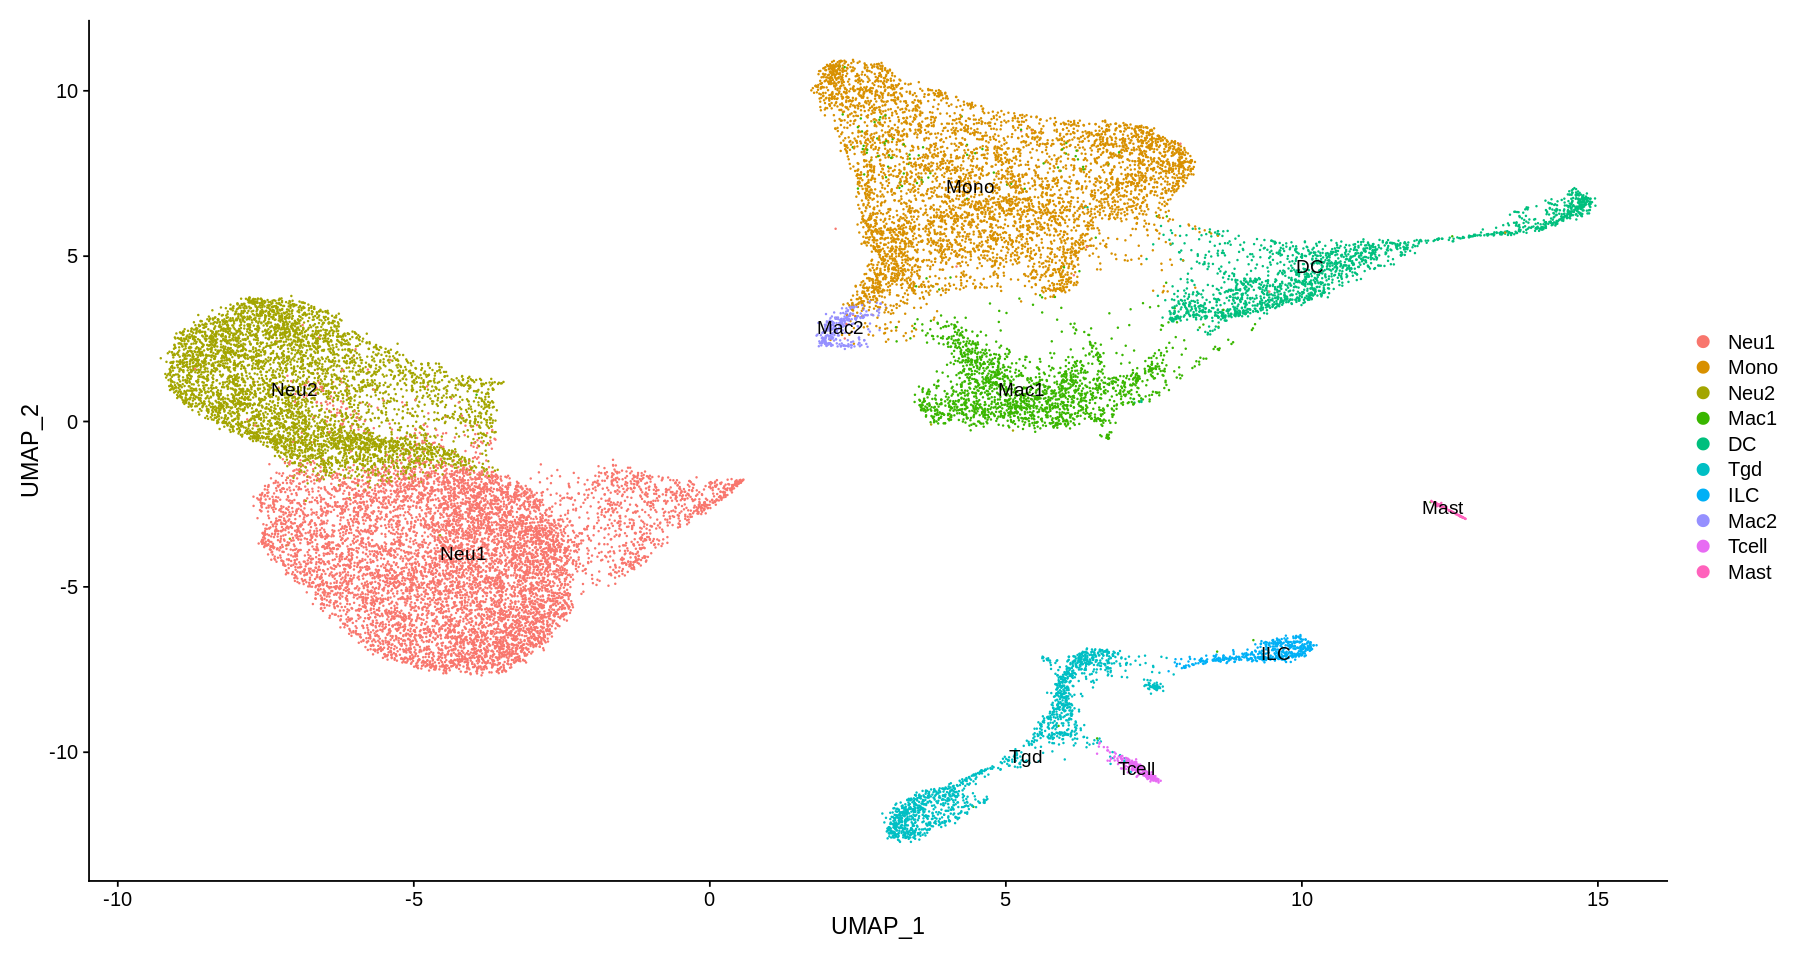

In [109]:

cluster_mice_cca.merged.obj <- RenameIdents(mice_cca.merged.obj, 
  `0` = "Neu1", `1` = "Mono", `2` = "Neu2",
  `3` = "Mac1", `4` = "DC",
  `5` = "Tgd", `6` = "ILC", `7` = "Mac2", 
  `8` = "Tcell",`9` = "Mast")

DimPlot(cluster_mice_cca.merged.obj, label = TRUE)

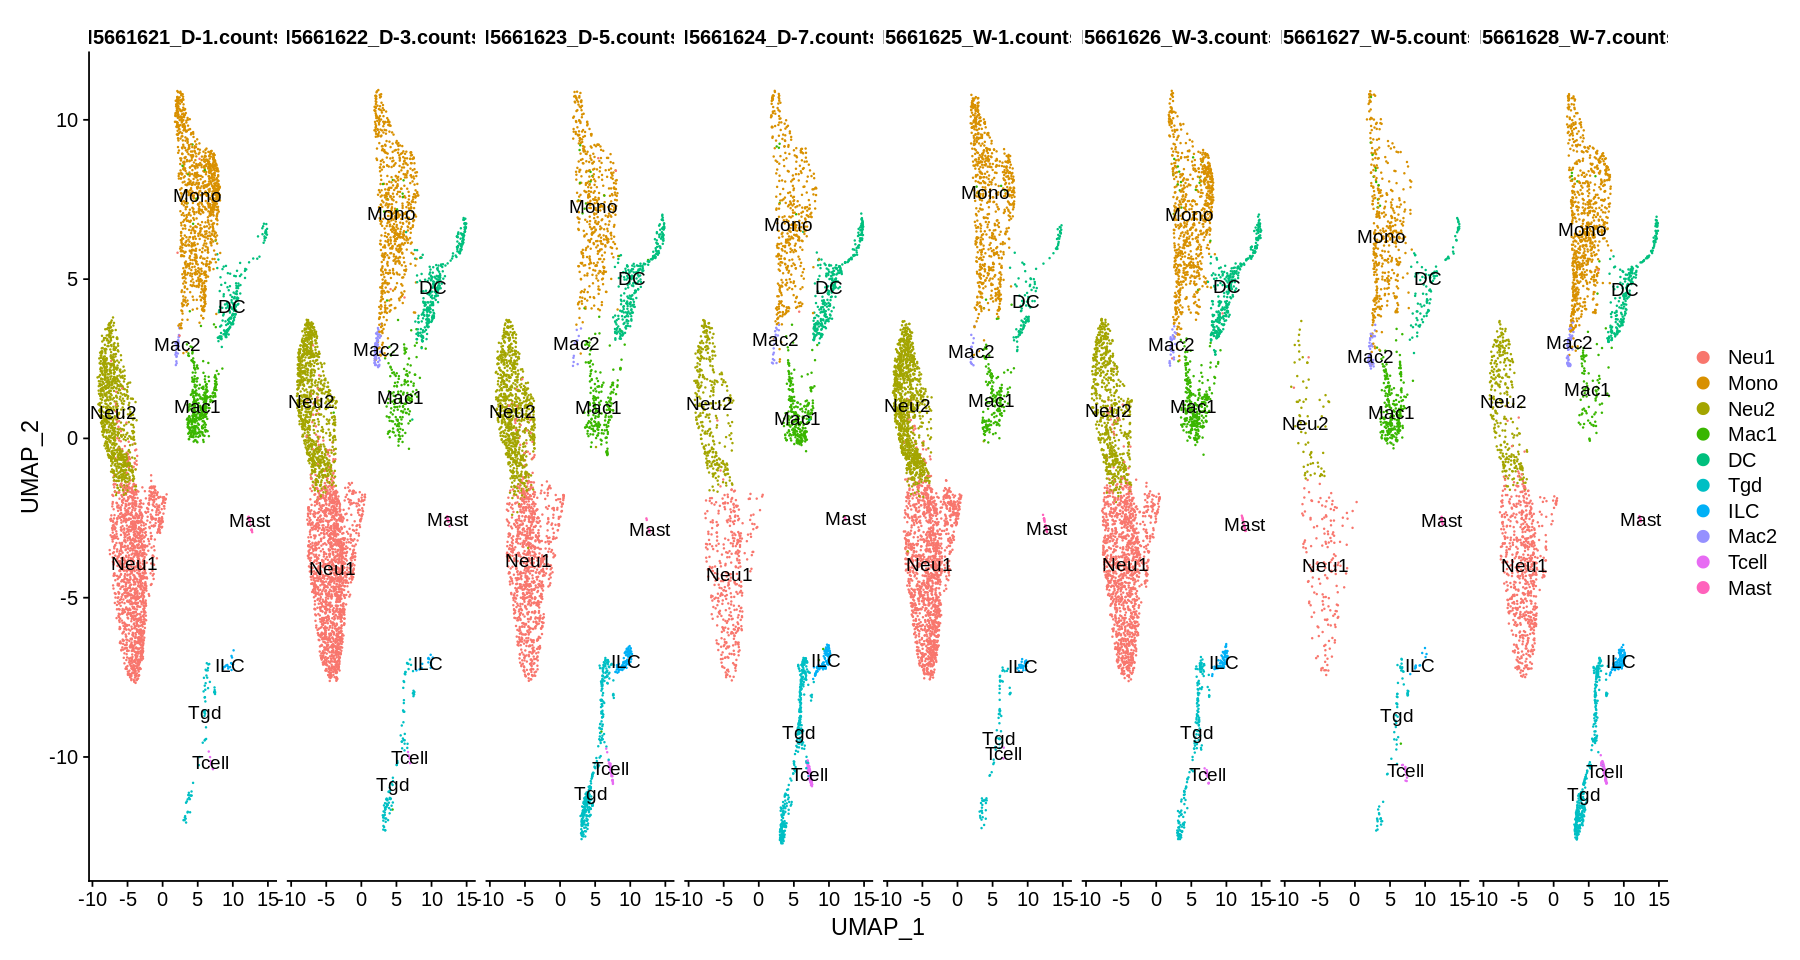

In [111]:
DimPlot(cluster_mice_cca.merged.obj, 
               split.by = "orig.ident", 
        label = TRUE) # Add labels to clusters

In [122]:
cluster_mice_cca.merged.obj

An object of class Seurat 
19648 features across 25063 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

In [124]:
saveRDS(cluster_mice_cca.merged.obj, file="/data2/ZenNa/mice_count_data/Result/cluster_micedata_final.rds")

In [113]:
group_counts <- table(cluster_mice_cca.merged.obj$orig.ident)


In [114]:
group_counts


GSM5661621_D-1.counts.tsv GSM5661622_D-3.counts.tsv GSM5661623_D-5.counts.tsv 
                     4191                      4011                      3276 
GSM5661624_D-7.counts.tsv GSM5661625_W-1.counts.tsv GSM5661626_W-3.counts.tsv 
                     2321                      3738                      3698 
GSM5661627_W-5.counts.tsv GSM5661628_W-7.counts.tsv 
                     1156                      2672 

In [116]:
cluster_counts <- table(cluster_mice_cca.merged.obj$seurat_clusters)
cluster_counts 


   0    1    2    3    4    5    6    7    8    9 
8292 5321 5153 1939 1792 1486  454  275  228  123 

In [118]:
cluster_counts <- table(cluster_mice_cca.merged.obj$seurat_clusters, cluster_mice_cca.merged.obj$orig.ident)
cluster_counts 

   
    GSM5661621_D-1.counts.tsv GSM5661622_D-3.counts.tsv
  0                      1536                      1684
  1                      1086                       680
  2                       871                       969
  3                       386                       181
  4                       177                       291
  5                        61                        94
  6                        15                        13
  7                        31                        72
  8                         7                         6
  9                        21                        21
   
    GSM5661623_D-5.counts.tsv GSM5661624_D-7.counts.tsv
  0                      1014                       391
  1                       453                       432
  2                       872                       337
  3                       229                       282
  4                       265                       295
  5                       310           

In [121]:
# Assuming cluster_counts is a table or matrix
# Convert it to a data frame
cluster_counts_df <- as.data.frame(cluster_counts)


# Specify the file path
file_path <- "/data2/ZenNa/mice_count_data/Result/allgroupcellcount.xlsx"

# Write the data frame to an Excel file
write_xlsx(cluster_counts_df, path = file_path)